# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

In [19]:
from platform import release

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [38]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

## Analizzo e pulisco i dati

In [39]:
print(list(oscar_df['category'].unique()))

['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY', 'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)', 'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE', 'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)', 'WRITING (Original Story)', 'WRITING (Title Writing)', 'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION', 'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)', 'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)', 'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)', 'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE', 'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)', 'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD', 'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)', 'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS', 'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)', 'WRITING (Original Screenplay)', 'DOCUMENTARY (Short Subject)', 'MUSIC (Music Score of a Dramatic

In [40]:
oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [23]:
duplicati = movies_df[movies_df.duplicated()]
duplicati

,id,name,date,tagline,description,minute,rating


In [25]:
prova = movies_df.loc[movies_df['name']=='The Last Command']
prova

,id,name,date,tagline,description,minute,rating
12303,1012304,The Last Command,1928.0,NaN,A former Imperial Russian general and cousin o...,88.0,3.97
74709,1074710,The Last Command,1955.0,THE BUGLE SOUNDS... No Mercy! No Quarter! for ...,During the Texas War of Independence of 1836 A...,110.0,3.19


In [26]:
oscar_df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [31]:
num = oscar_df['film'].isna().sum()
print(num)


319


## Quale paese ha vinto più oscar?
* Seleziono i vincitori di un Oscar
* Cerco tra i film vincitori chi ha una corrispondenza in movies_df secondo il nome e la data del film
* Cerco per ogni film vincitore il paese corrispondente

In [98]:
oscar_win_df=oscar_df.loc[(oscar_df['winner']==True) & (oscar_df['category']=='BEST PICTURE')]
oscar_win_df

,year_film,year_ceremony,ceremony,category,name,film,winner
3923,1962,1963,35,BEST PICTURE,"Sam Spiegel, Producer",Lawrence of Arabia,True
4049,1963,1964,36,BEST PICTURE,"Tony Richardson, Producer",Tom Jones,True
4173,1964,1965,37,BEST PICTURE,"Jack L. Warner, Producer",My Fair Lady,True
4295,1965,1966,38,BEST PICTURE,"Robert Wise, Producer",The Sound of Music,True
4418,1966,1967,39,BEST PICTURE,"Fred Zinnemann, Producer",A Man for All Seasons,True
...,...,...,...,...,...,...,...
10350,2019,2020,92,BEST PICTURE,"Kwak Sin Ae and Bong Joon Ho, Producers",Parasite,True
10474,2020,2021,93,BEST PICTURE,"Frances McDormand, Peter Spears, Mollye Asher,...",Nomadland,True
10591,2021,2022,94,BEST PICTURE,"Philippe Rousselet, Fabrice Gianfermi and Patr...",CODA,True
10718,2022,2023,95,BEST PICTURE,"Daniel Kwan, Daniel Scheinert and Jonathan Wan...",Everything Everywhere All at Once,True


In [99]:
oscar_win_df = pd.merge(oscar_win_df, movies_df, left_on=['film','year_film'], right_on=['name','date'], how='inner')
oscar_win_df

,year_film,year_ceremony,ceremony,category,name_x,film,winner,id,name_y,date,tagline,description,minute,rating
0,1962,1963,35,BEST PICTURE,"Sam Spiegel, Producer",Lawrence of Arabia,True,1000841,Lawrence of Arabia,1962.0,A mighty motion picture of action and adventure!,The story of British officer T.E. Lawrence's m...,228.0,4.36
1,1963,1964,36,BEST PICTURE,"Tony Richardson, Producer",Tom Jones,True,1008799,Tom Jones,1963.0,Tom Jones!... loves and loves and loves and lo...,Tom loves Sophie and Sophie loves Tom. But Tom...,128.0,2.91
2,1964,1965,37,BEST PICTURE,"Jack L. Warner, Producer",My Fair Lady,True,1002297,My Fair Lady,1964.0,The loverliest motion picture of them all!,A snobbish phonetics professor agrees to a wag...,170.0,3.60
3,1965,1966,38,BEST PICTURE,"Robert Wise, Producer",The Sound of Music,True,1000739,The Sound of Music,1965.0,The happiest sound in all the world!,A tomboyish postulant at an Austrian abbey bec...,174.0,4.11
4,1966,1967,39,BEST PICTURE,"Fred Zinnemann, Producer",A Man for All Seasons,True,1005990,A Man for All Seasons,1966.0,...a motion picture for all times!,A depiction of the conflict between King Henry...,120.0,3.80
5,1967,1968,40,BEST PICTURE,"Walter Mirisch, Producer",In the Heat of the Night,True,1002702,In the Heat of the Night,1967.0,They got a murder on their hands. They don’t k...,An African American detective is asked to inve...,109.0,4.02
6,1968,1969,41,BEST PICTURE,"John Woolf, Producer",Oliver!,True,1005568,Oliver!,1968.0,Much Much More Than a Musical!,Musical adaptation of Charles Dickens' Oliver ...,153.0,3.56
7,1969,1970,42,BEST PICTURE,"Jerome Hellman, Producer",Midnight Cowboy,True,1001343,Midnight Cowboy,1969.0,Whatever you hear about Midnight Cowboy is true,Joe Buck is a wide-eyed hustler from Texas hop...,113.0,4.13
8,1970,1971,43,BEST PICTURE,"Frank McCarthy, Producer",Patton,True,1003994,Patton,1970.0,The Rebel Warrior,"""Patton"" tells the tale of General George S. P...",172.0,3.87
9,1971,1972,44,BEST PICTURE,"Philip D'Antoni, Producer",The French Connection,True,1001479,The French Connection,1971.0,There are no rules and no holds barred when Po...,Tough narcotics detective 'Popeye' Doyle is in...,104.0,4.00


In [100]:
oscar_win_df = oscar_win_df[['id','name_y','date','minute','rating','category','name_x','winner']].copy()
oscar_win_df = oscar_win_df.set_index('id')
oscar_win_df

,name_y,date,minute,rating,category,name_x,winner
id,,,,,,,
1000841,Lawrence of Arabia,1962.0,228.0,4.36,BEST PICTURE,"Sam Spiegel, Producer",True
1008799,Tom Jones,1963.0,128.0,2.91,BEST PICTURE,"Tony Richardson, Producer",True
1002297,My Fair Lady,1964.0,170.0,3.60,BEST PICTURE,"Jack L. Warner, Producer",True
1000739,The Sound of Music,1965.0,174.0,4.11,BEST PICTURE,"Robert Wise, Producer",True
1005990,A Man for All Seasons,1966.0,120.0,3.80,BEST PICTURE,"Fred Zinnemann, Producer",True
1002702,In the Heat of the Night,1967.0,109.0,4.02,BEST PICTURE,"Walter Mirisch, Producer",True
1005568,Oliver!,1968.0,153.0,3.56,BEST PICTURE,"John Woolf, Producer",True
1001343,Midnight Cowboy,1969.0,113.0,4.13,BEST PICTURE,"Jerome Hellman, Producer",True
1003994,Patton,1970.0,172.0,3.87,BEST PICTURE,"Frank McCarthy, Producer",True


In [101]:
oscar_win_df = pd.merge(oscar_win_df, countries_df, left_on='id', right_on='id', how='inner')
oscar_win_df

,id,name_y,date,minute,rating,category,name_x,winner,country
0,1000841,Lawrence of Arabia,1962.0,228.0,4.36,BEST PICTURE,"Sam Spiegel, Producer",True,UK
1,1008799,Tom Jones,1963.0,128.0,2.91,BEST PICTURE,"Tony Richardson, Producer",True,UK
2,1008799,Tom Jones,1963.0,128.0,2.91,BEST PICTURE,"Tony Richardson, Producer",True,USA
3,1002297,My Fair Lady,1964.0,170.0,3.60,BEST PICTURE,"Jack L. Warner, Producer",True,USA
4,1000739,The Sound of Music,1965.0,174.0,4.11,BEST PICTURE,"Robert Wise, Producer",True,USA
...,...,...,...,...,...,...,...,...,...
82,1000646,CODA,2021.0,112.0,3.86,BEST PICTURE,"Philippe Rousselet, Fabrice Gianfermi and Patr...",True,France
83,1000646,CODA,2021.0,112.0,3.86,BEST PICTURE,"Philippe Rousselet, Fabrice Gianfermi and Patr...",True,USA
84,1000003,Everything Everywhere All at Once,2022.0,140.0,4.30,BEST PICTURE,"Daniel Kwan, Daniel Scheinert and Jonathan Wan...",True,USA
85,1000006,Oppenheimer,2023.0,181.0,4.23,BEST PICTURE,"Emma Thomas, Charles Roven and Christopher Nol...",True,UK


In [114]:
conteggi = oscar_win_df['country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['country', 'count']  # Rinomina le colonne

conteggi_df

,country,count
0,USA,53
1,UK,16
2,France,4
3,India,2
4,Turkey,2
5,Canada,2
6,Italy,1
7,China,1
8,New Zealand,1
9,Germany,1


In [115]:
world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [123]:
conteggi_df['country'] = conteggi_df['country'].replace('USA','United States of America')
conteggi_df['country'] = conteggi_df['country'].replace('UK','United Kingdom')

In [124]:
merged = world.merge(conteggi_df,how='left',left_on='NAME',right_on='country')
merged['count']=merged['count'].fillna(0)

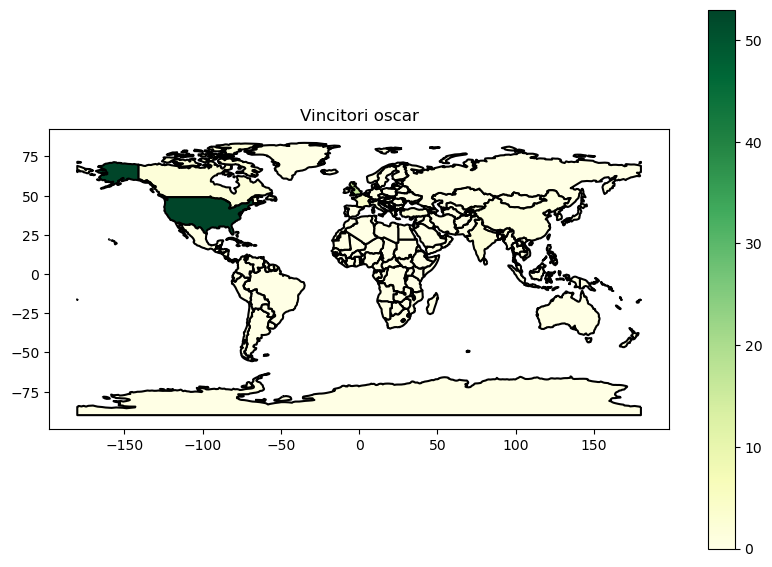

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
merged.plot(column='count', ax=ax, legend=True,cmap='YlGn',edgecolor='black',linewidth=1.5, figsize=(15,10))
plt.title('Vincitori oscar')
plt.show()

## Chi ha prodotto più film?

## La bellezza di un film, può essere influenzata dalla durata?

## Nel tempo come si è evoluta la durata media dei film?